# Stable Diffusion - running it from Jupyter Notebook

- example focusing on LCM LoRA

In [2]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
%pip install peft
%pip install diffusers
%pip install huggingface_hub
%pip install ipywidgets
%pip install accelerate
%pip install transformers

Looking in indexes: https://download.pytorch.org/whl/cu121

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 2

In [3]:
import torch
from diffusers import DiffusionPipeline, LCMScheduler

In [4]:
from huggingface_hub import notebook_login
notebook_login()

In [5]:
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
# set scheduler
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

# LoRA parameters obtained through LCM-LoRA training ('acceleration vector') can be
# directly combined with other LoRA parameters ('style vetcor') obtained by
# fine-tuning on a particular style dataset.

# load LoRAs
pipe. load_lora_weights("latent-consistency/lcm-lora-sdxl", adapter_name="1cm")
pipe. load_lora_weights("TheLastBen/Papercut_SDXL", weight_name="papercut.safetensors", adapter_name="papercut")

# Combine LoRAs
pipe.set_adapters(["1cm", "papercut"], adapter_weights=[1.0, 0.8])

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [9]:
prompt = "papercut, a young hobbit meets a dragon under the mountain"
generator = torch.manual_seed(0)

  0%|          | 0/4 [00:00<?, ?it/s]

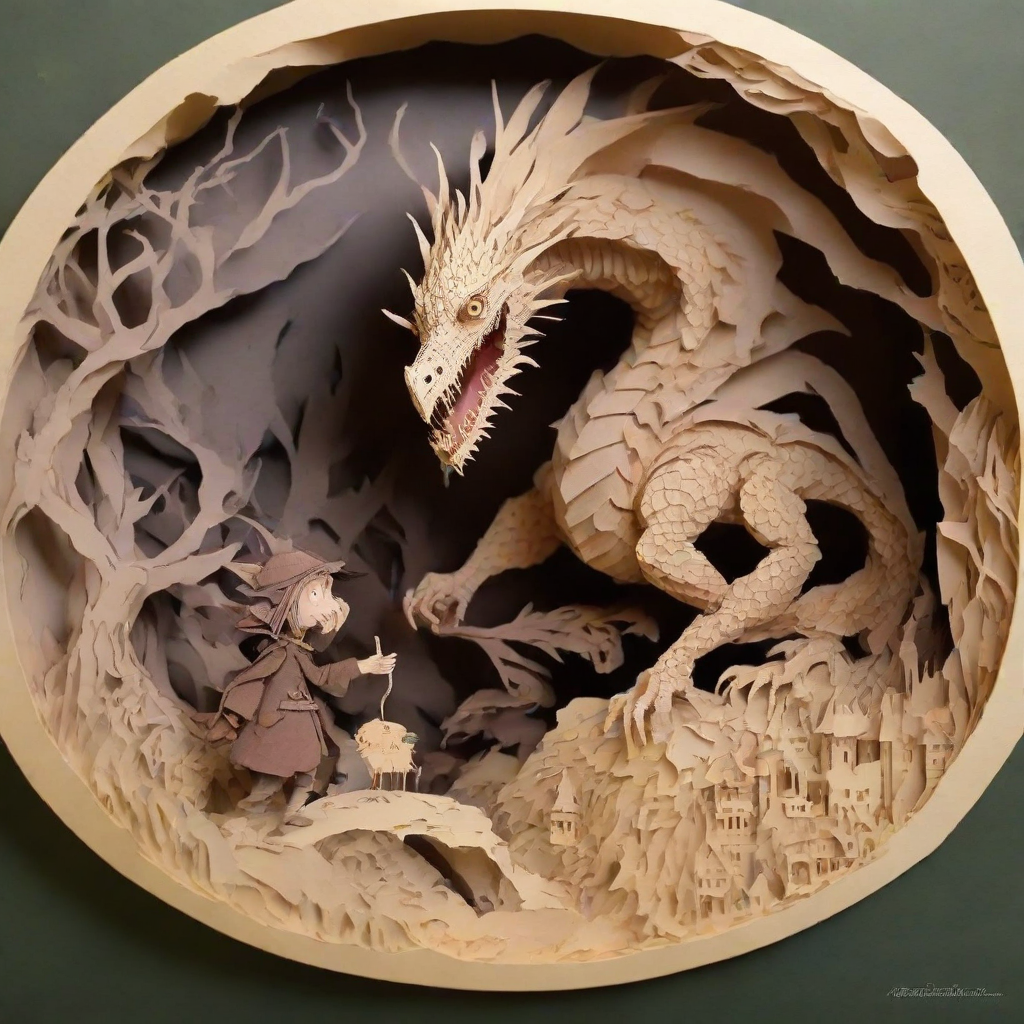

In [10]:
image = pipe(prompt, num_inference_steps=4, guidance_scale=1, generator=generator).images[0]
image

In [11]:
prompt = "papercut, Monstrous blizzard with the fierce face of a bear, engulfed in whiteout conditions, swirling snow, and buffeting winds. Cinematic, mysterious, sinister, scary, wild, deadly, and beastly. A nightmarish masterpiece."
generator = torch.manual_seed(0)

  0%|          | 0/4 [00:00<?, ?it/s]

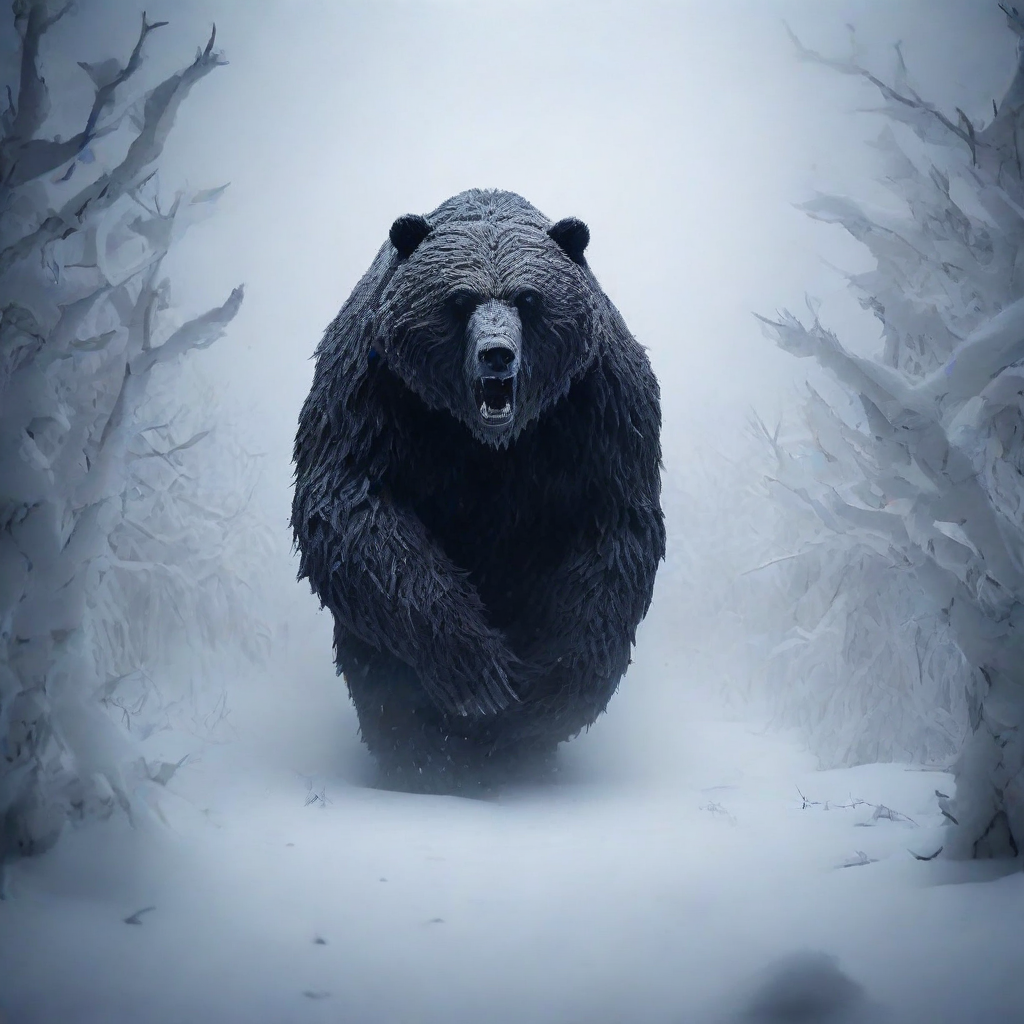

In [12]:
image = pipe(prompt, num_inference_steps=4, guidance_scale=1, generator=generator).images[0]
image

In [17]:
prompt = "papercut, a staircase leading to a castle in the clouds"
generator = torch.manual_seed(0)

  0%|          | 0/4 [00:00<?, ?it/s]

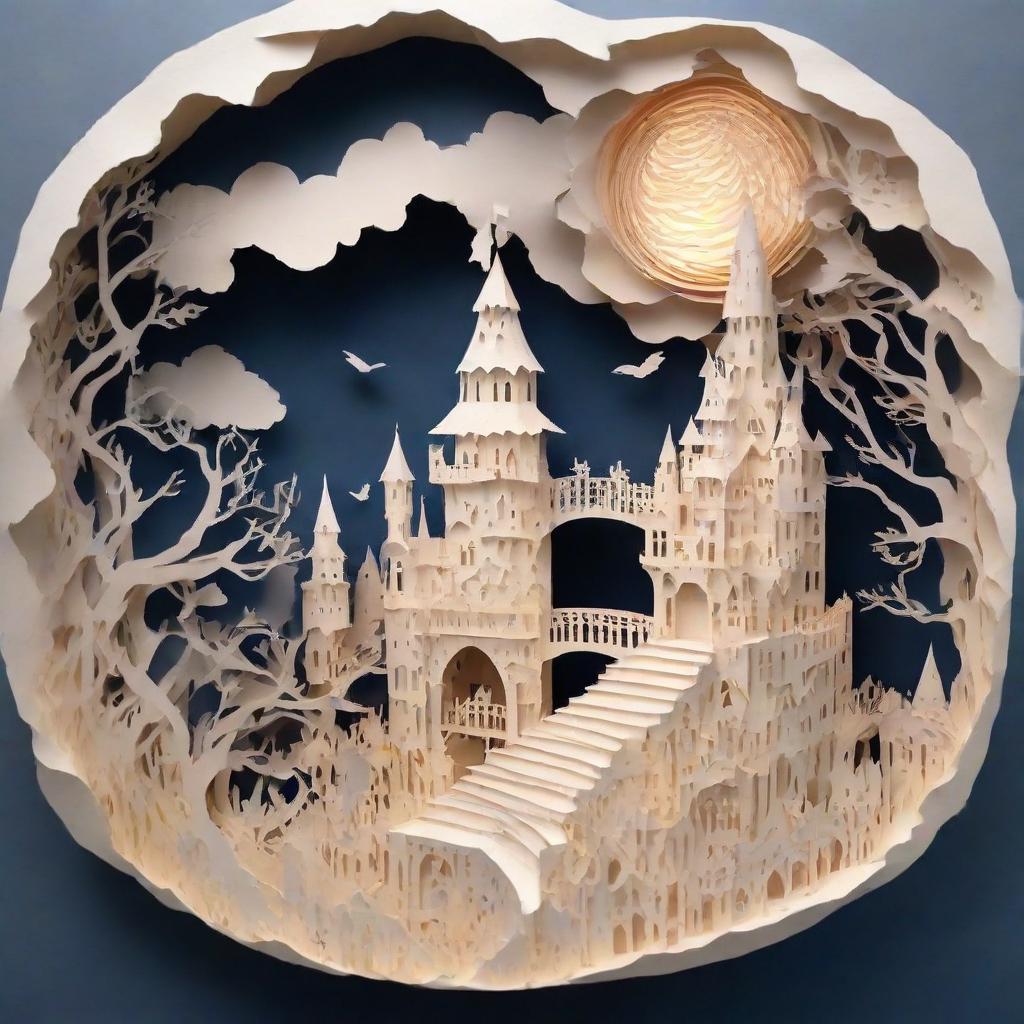

In [18]:
image = pipe(prompt, num_inference_steps=4, guidance_scale=1, generator=generator).images[0]
image